### Testing Code

In [34]:
from pymatgen.ext.matproj import MPRester

with MPRester("dVrkjZsDAlhmhQadaj") as mpr:
    dos = mpr.get_dos_by_material_id("mp-48")

No module named 'mp_api'


/Users/akmal/Documents/itb/dos/env/lib/python3.9/site-packages/pymatgen/ext/matproj.py:185: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


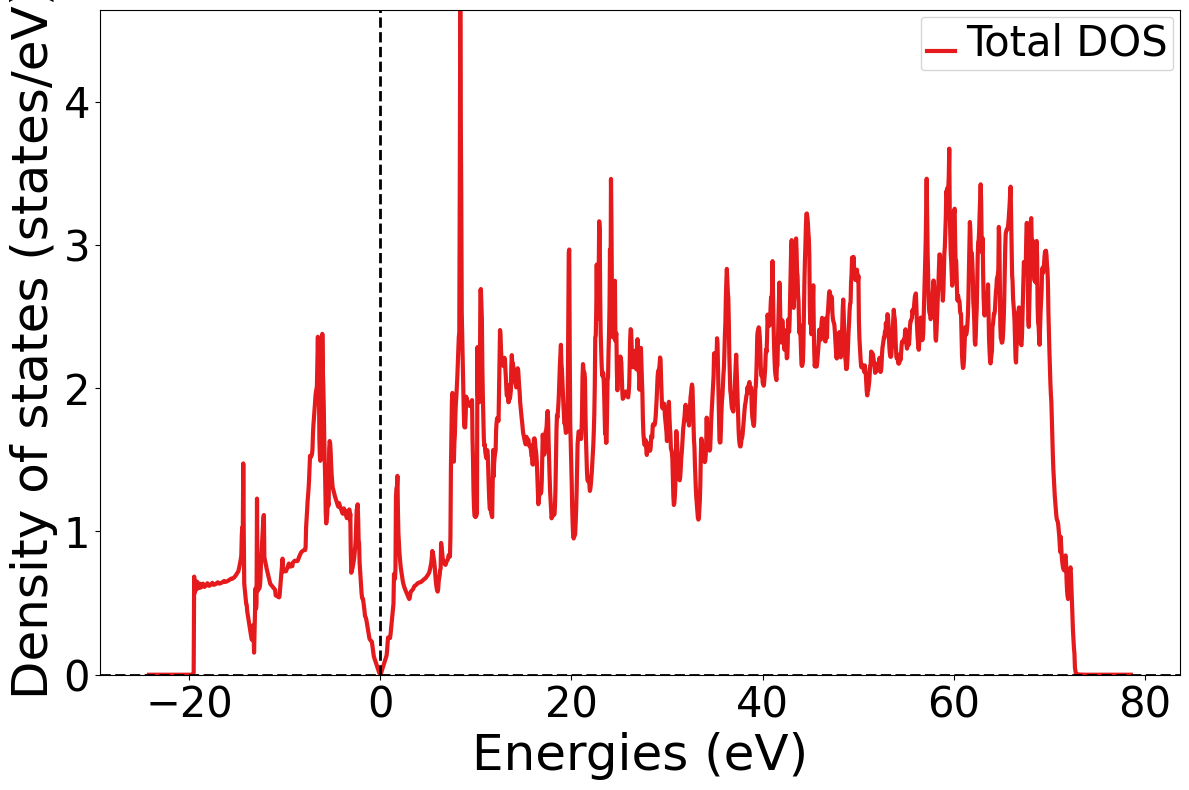

In [35]:
from pymatgen.electronic_structure.plotter import DosPlotter

# Assuming dos_object is your CompleteDos object
dos_plotter = DosPlotter()
dos_plotter.add_dos("Total DOS", dos)
dos_plotter.show()


In [44]:
from pymatgen.ext.matproj import MPRester
import random

random.seed(42)

mpr = MPRester("dVrkjZsDAlhmhQadaj")

elements_to_filter = ["C", "H"]

criteria_c = {
    "dos": {"$exists": True},
    "elements": {"$in": ["C"]},
}

docs_c = mpr.query(criteria=criteria_c, properties=["material_id"])

criteria_h = {
    "dos": {"$exists": True},
    "elements": {"$in": ["H"]},
}

docs_h = mpr.query(criteria=criteria_h, properties=["material_id"])

mpids_with_dos_and_c = [doc["material_id"] for doc in docs_c]
mpids_with_dos_and_h = [doc["material_id"] for doc in docs_h]

criteria_both = {
    "dos": {"$exists": True},
    "elements": {"$all": elements_to_filter},
}

docs_both = mpr.query(criteria=criteria_both, properties=["material_id"])

mpids_with_dos_and_both = [doc["material_id"] for doc in docs_both]

mpids_with_dos_and_elements = list(set(mpids_with_dos_and_c+mpids_with_dos_and_h+mpids_with_dos_and_both))


No module named 'mp_api'


100%|██████████| 1218/1218 [00:01<00:00, 1096.67it/s]


In [45]:
len(mpids_with_dos_and_elements)

9725

In [22]:
from pymatgen.ext.matproj import MPRester
import random

random.seed(42)

mpr = MPRester("dVrkjZsDAlhmhQadaj")

elements_to_filter = ["C", "H"]

criteria_c = {
    "dos": {"$exists": True},
    "elements": {"$in": ["C"]},
}

docs_c = mpr.query(criteria=criteria_c, properties=["material_id"])

criteria_h = {
    "dos": {"$exists": True},
    "elements": {"$in": ["H"]},
}

docs_h = mpr.query(criteria=criteria_h, properties=["material_id"])

mpids_with_dos_and_c = [doc["material_id"] for doc in docs_c]
mpids_with_dos_and_h = [doc["material_id"] for doc in docs_h]

criteria_both = {
    "dos": {"$exists": True},
    "elements": {"$all": elements_to_filter},
}

docs_both = mpr.query(criteria=criteria_both, properties=["material_id"])

mpids_with_dos_and_both = [doc["material_id"] for doc in docs_both]

random_c = random.sample(mpids_with_dos_and_c, 332)
random_h = random.sample(mpids_with_dos_and_h, 332)
random_both = random.sample(mpids_with_dos_and_both, 333)

mpids_with_dos_and_elements = list(set(random_c + random_h + random_both))


No module named 'mp_api'


/Users/akmal/Documents/itb/dos/env/lib/python3.9/site-packages/pymatgen/ext/matproj.py:185: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(
100%|██████████| 1218/1218 [00:01<00:00, 931.55it/s] 


In [23]:
len(mpids_with_dos_and_elements)

947

In [25]:
from pymatgen.ext.matproj import MPRester
import pandas as pd


In [26]:
mpr = MPRester("dVrkjZsDAlhmhQadaj")


No module named 'mp_api'


In [33]:
from pymatgen import MPRester
import pandas as pd

mpr = MPRester("YOUR_API_KEY")

data = []

for mp_id in mpids_with_dos_and_elements:
    material = mpr.query(
        criteria={"material_id": mp_id},
        properties=["pretty_formula", "structure", "band_gap", "efermi"]
    )

    if material:
        material = material[0]
        pretty_formula = material.get("pretty_formula")
        structure = material.get("structure")
        band_gap = material.get("band_gap")
        fermi_energy = material.get("efermi")

        dos = mpr.get_dos_by_material_id(mp_id)

        if dos:
            dos_energies = dos.energies
            dos_densities = dos.densities
        else:
            dos_energies = dos_densities = None

        data.append({
            "Material ID": mp_id,
            "Formula": pretty_formula,
            "Structure": structure,
            "Band Gap (eV)": band_gap,
            "Fermi Energy (eV)": fermi_energy,
            "DOS Energies (eV)": dos_energies,
            "DOS Densities": dos_densities,
            "DOS": dos
        })

df = pd.DataFrame(data)


In [45]:
df.sample(5)

,Material ID,Formula,Structure,Band Gap (eV),Fermi Energy (eV),DOS Energies (eV),DOS Densities,DOS
240,mp-600167,CuH6(CO2)4,"[[0. 4.2791495 6.2236565] Cu, [3.981927...",0.0000,-0.163924,None,None,None
793,mp-1063678,H3S,"[[-0.15328512 0. 1.77374832] H, [1.2...",0.0000,5.108758,"[-17.0859, -17.0395, -16.993, -16.9466, -16.90...","{1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",Complete DOS for Full Formula (H3 S1)\nReduced...
405,mp-1204733,GeBiH8C2S4N,"[[1.3575205 6.41037173 3.70087077] Ge, [4.938...",2.4525,1.019584,None,None,None
69,mp-561521,PH8C2NO2,"[[2.25327787 2.76115545 4.99007502] P, [5.4177...",5.0183,-0.585818,"[-21.2788, -21.2161, -21.1535, -21.0908, -21.0...","{1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",Complete DOS for Full Formula (P4 H32 C8 N4 O8...
806,mp-28898,BaCN2,"[[3.3338623 1.59593834 0.26040587] Ba, [-1.46...",2.2874,0.752992,"[-27.3798, -27.3595, -27.3392, -27.3188, -27.2...","{1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",Complete DOS for Full Formula (Ba6 C6 N12)\nRe...


In [42]:
df[df["Material ID"]=="mp-48"]

,Material ID,Formula,Structure,Band Gap (eV),Fermi Energy (eV),DOS Energies (eV),DOS Densities,DOS


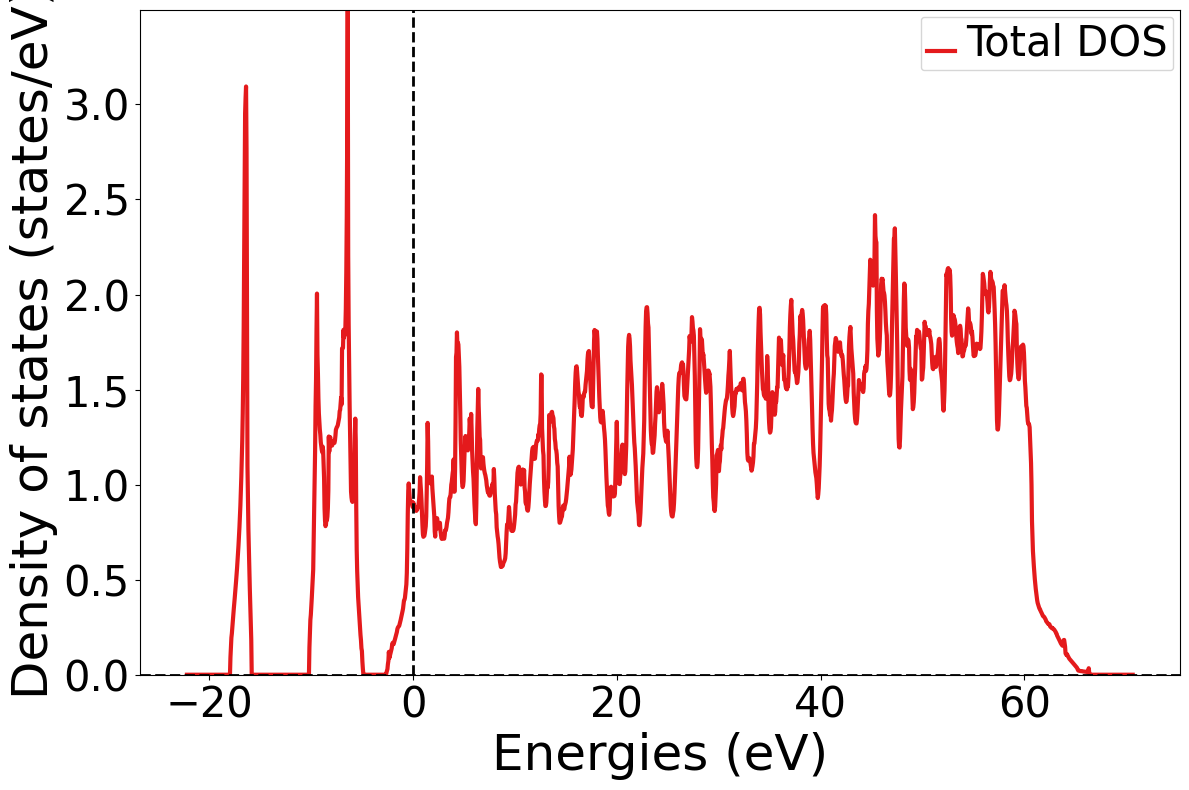

In [46]:
from pymatgen.electronic_structure.plotter import DosPlotter

dos_plotter = DosPlotter()
dos_plotter.add_dos("Total DOS", df["DOS"][793])
dos_plotter.show()


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Material ID        947 non-null    object 
 1   Formula            947 non-null    object 
 2   Structure          947 non-null    object 
 3   Band Gap (eV)      947 non-null    float64
 4   Fermi Energy (eV)  947 non-null    float64
 5   DOS Energies (eV)  805 non-null    object 
 6   DOS Densities      805 non-null    object 
 7   DOS                805 non-null    object 
dtypes: float64(2), object(6)
memory usage: 59.3+ KB


In [48]:
df.dropna(inplace=True)

In [50]:
df.to_csv("/Users/akmal/Documents/itb/dos/df1.csv")

In [53]:
df.iloc[1,:]

Material ID                                                  mp-558541
Formula                                                    H9C3SeSN2Cl
Structure            [[4.30223992 2.75608111 7.25052879] H, [3.2344...
Band Gap (eV)                                                   3.4735
Fermi Energy (eV)                                            -0.247995
DOS Energies (eV)    [-21.7543, -21.7364, -21.7185, -21.7006, -21.6...
DOS Densities        {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
DOS                  Complete DOS for Full Formula (H18 C6 Se2 S2 N...
Name: 1, dtype: object

In [40]:
print(df["Structure"][1])

Full Formula (H18 C6 Se2 S2 N4 Cl2)
Reduced Formula: H9C3SeSN2Cl
abc   :   5.693720   8.304110   9.208453
angles:  70.573235  81.793549  77.677337
pbc   :       True       True       True
Sites (34)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  H     0.548042  0.045748  0.837455         0
  1  H     0.285897  0.856553  0.067416        -0
  2  H     0.630177  0.646763  0.000928        -0
  3  H     0.180794  0.092307  0.515327         0
  4  H     0.198025  0.19709   0.3065           0
  5  H     0.801975  0.80291   0.6935           0
  6  H     0.714103  0.143447  0.932584        -0
  7  H     0.157973  0.505295  0.867092         0
  8  H     0.14156   0.276023  0.932834        -0
  9  H     0.451958  0.954252  0.162545         0
 10  H     0.819206  0.907693  0.484673         0
 11  H     0.813925  0.135276  0.73955          0
 12  H     0.842027  0.494705  0.132908         0
 13  H     0.369823  0.353237  0.999072        -0
 

In [65]:
structure.lattice

Lattice
    abc : 5.69372 8.304111 9.208453
 angles : 70.573235 81.793549 77.677338
 volume : 399.92152855210776
      A : 5.635417251633599 0.0 0.8127237159025317
      B : 1.392249928963453 7.706586027346319 2.7619615201397676
      C : 0.0 0.0 9.208453
    pbc : True True True

In [69]:
sites = structure.sites

In [73]:
sites

[PeriodicSite: H0 (H) (3.152, 0.3526, 8.283) [0.548, 0.04575, 0.8375],
 PeriodicSite: H1 (H) (2.804, 6.601, 3.219) [0.2859, 0.8566, 0.06742],
 PeriodicSite: H2 (H) (4.452, 4.984, 2.307) [0.6302, 0.6468, 0.000928],
 PeriodicSite: H3 (H) (1.147, 0.7114, 5.147) [0.1808, 0.09231, 0.5153],
 PeriodicSite: H4 (H) (1.39, 1.519, 3.528) [0.198, 0.1971, 0.3065],
 PeriodicSite: H5 (H) (5.637, 6.188, 9.255) [0.802, 0.8029, 0.6935],
 PeriodicSite: H6 (H) (4.224, 1.105, 9.564) [0.7141, 0.1434, 0.9326],
 PeriodicSite: H7 (H) (1.594, 3.894, 9.509) [0.158, 0.5053, 0.8671],
 PeriodicSite: H8 (H) (1.182, 2.127, 9.467) [0.1416, 0.276, 0.9328],
 PeriodicSite: H9 (H) (3.876, 7.354, 4.5) [0.452, 0.9543, 0.1625],
 PeriodicSite: H10 (H) (5.88, 6.995, 7.636) [0.8192, 0.9077, 0.4847],
 PeriodicSite: H11 (H) (4.775, 1.043, 7.845) [0.8139, 0.1353, 0.7396],
 PeriodicSite: H12 (H) (5.434, 3.812, 3.275) [0.842, 0.4947, 0.1329],
 PeriodicSite: H13 (H) (2.576, 2.722, 10.48) [0.3698, 0.3532, 0.9991],
 PeriodicSite: H14 (

In [70]:
coordinates = [site.coords for site in sites]
coordinates

[array([3.15213799, 0.3525609 , 8.28342595]),
 array([2.80368474, 6.60109938, 3.21891877]),
 array([4.45176608, 4.9843347 , 2.30703976]),
 array([1.14736404, 0.71137184, 5.14724841]),
 array([1.39035204, 1.51889104, 3.52768545]),
 array([5.63731514, 6.18769499, 9.25545278]),
 array([4.22398244, 1.10548665, 9.56421947]),
 array([1.5937407 , 3.89409939, 9.50856968]),
 array([1.18204267, 2.127195  , 9.46737212]),
 array([3.87552919, 7.35402513, 4.49971228]),
 array([5.88030314, 6.99521419, 7.63588982]),
 array([4.77514499, 1.04251613, 7.84523467]),
 array([5.43392648, 3.81248664, 3.27456856]),
 array([ 2.5759011 ,  2.72225133, 10.47609848]),
 array([2.25252219, 6.6640699 , 4.93790356]),
 array([5.84562451, 5.57939103, 3.31576612]),
 array([6.50350204, 5.30787259, 7.91673365]),
 array([0.52416514, 2.39871343, 4.86640459]),
 array([1.28647618, 1.65733986, 4.60566214]),
 array([1.98321588, 2.870002  , 9.56090805]),
 array([5.741191  , 6.04924617, 8.17747609]),
 array([3.90585935, 1.12424448,

In [72]:
species = [site.specie for site in sites]
species

[Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element H,
 Element C,
 Element C,
 Element C,
 Element C,
 Element C,
 Element C,
 Element Se,
 Element Se,
 Element S,
 Element S,
 Element N,
 Element N,
 Element N,
 Element N,
 Element Cl,
 Element Cl]

In [62]:
len(df["DOS Energies (eV)"][242])

59

In [64]:
len(df["DOS Densities"][32])

4356

In [46]:
from pymatgen.io.cif import CifWriter
from pymatgen.vis.structure_vtk import StructureVTKViewer
from IPython.display import Image
import matplotlib.pyplot as plt

# Initialize MPRester with your API key
mpr = MPRester("dVrkjZsDAlhmhQadaj")

# Retrieve the crystal structure data by Material ID or formula
# Replace 'mp-12345' with the actual Material ID or 'LiFePO4' with the formula
material_id_or_formula = "mp-48"

structure = df["Structure"][1]
    # If Material ID fetch fails, try fetching by formula

# Plot the crystal structure
vis = viewer = StructureVTKViewer(structure)
vis.set_unitcell()
vis.show()

# Optionally, save the plot to an image file
image_path = "structure_plot.png"
vis.save_image(image_path)
Image(filename=image_path)


ImportError: cannot import name 'StructureVTKViewer' from 'pymatgen.vis.structure_vtk' (/Users/akmal/Documents/itb/dos/env/lib/python3.9/site-packages/pymatgen/vis/structure_vtk.py)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/akmal/Documents/itb/dos/df1.csv")

In [8]:
df.head()

,Unnamed: 0,Material ID,Formula,Structure,Band Gap (eV),Fermi Energy (eV),DOS Energies (eV),DOS Densities,DOS
0,0,mp-745208,DyFeH8C6(N3O2)2,Full Formula (Dy2 Fe2 H16 C12 N12 O8)\nReduced...,2.6547,-1.968932,[-58.2239 -57.9774 -57.731 -57.4845 -57.2381 ...,"{<Spin.up: 1>: array([0.0000e+00, 0.0000e+00, ...",Complete DOS for Full Formula (Dy2 Fe2 H16 C12...
1,1,mp-558541,H9C3SeSN2Cl,Full Formula (H18 C6 Se2 S2 N4 Cl2)\nReduced F...,3.4735,-0.247995,[-21.7543 -21.7364 -21.7185 ... 13.957 13.9...,"{<Spin.up: 1>: array([0., 0., 0., ..., 0., 0.,...",Complete DOS for Full Formula (H18 C6 Se2 S2 N...
2,2,mp-720100,NaH18C9I(NO)3,Full Formula (Na2 H36 C18 I2 N6 O6)\nReduced F...,0.1662,-1.003141,[-27.8194 -27.6902 -27.561 -27.4317 -27.3025 ...,"{<Spin.up: 1>: array([0.0000e+00, 0.0000e+00, ...",Complete DOS for Full Formula (Na2 H36 C18 I2 ...
3,3,mp-759069,B(HO)3,Full Formula (B6 H18 O18)\nReduced Formula: B(...,6.0914,-2.720972,[-23.857 -23.836 -23.815 ... 18.1418 18.1...,"{<Spin.up: 1>: array([0., 0., 0., ..., 0., 0.,...",Complete DOS for Full Formula (B6 H18 O18)\nRe...
4,4,mp-40573,FeCu2H21(O5F4)2,Full Formula (Fe1 Cu2 H21 O10 F8)\nReduced For...,0.6285,-0.936231,[-75.8784 -75.8281 -75.7777 ... 24.7327 24.7...,"{<Spin.up: 1>: array([0., 0., 0., ..., 0., 0.,...",Complete DOS for Full Formula (Fe1 Cu2 H21 O10...


In [3]:
structure = df["Structure"][1]


In [4]:
df["Material ID"][1]

'mp-558541'

In [5]:
quick_view(structure)

NameError: name 'quick_view' is not defined

In [6]:
from chemview import MolecularViewer


ModuleNotFoundError: No module named 'notebook.nbextensions'

In [9]:
structure

'Full Formula (H18 C6 Se2 S2 N4 Cl2)\nReduced Formula: H9C3SeSN2Cl\nabc   :   5.693720   8.304110   9.208453\nangles:  70.573235  81.793549  77.677337\npbc   :       True       True       True\nSites (34)\n  #  SP           a         b         c    magmom\n---  ----  --------  --------  --------  --------\n  0  H     0.548042  0.045748  0.837455         0\n  1  H     0.285897  0.856553  0.067416        -0\n  2  H     0.630177  0.646763  0.000928        -0\n  3  H     0.180794  0.092307  0.515327         0\n  4  H     0.198025  0.19709   0.3065           0\n  5  H     0.801975  0.80291   0.6935           0\n  6  H     0.714103  0.143447  0.932584        -0\n  7  H     0.157973  0.505295  0.867092         0\n  8  H     0.14156   0.276023  0.932834        -0\n  9  H     0.451958  0.954252  0.162545         0\n 10  H     0.819206  0.907693  0.484673         0\n 11  H     0.813925  0.135276  0.73955          0\n 12  H     0.842027  0.494705  0.132908         0\n 13  H     0.369823  0.353237

In [22]:
from pymatgen import Structure


ImportError: cannot import name 'Structure' from 'pymatgen' (unknown location)

In [19]:
from pymatgen.io.vasp.outputs import Poscar

In [21]:
poscar = Poscar(structure)


AttributeError: 'str' object has no attribute 'is_ordered'

In [29]:
from pymatgen.core.structure import Structure
from pymatgen.io.vasp.outputs import Poscar

# Define the corrected structure string in the POSCAR format
structure_string = """
Li4 Fe4 P4 O16
1.0
5.69149 0.00000 0.00000
0.00000 5.98914 0.00000
0.00000 0.00000 5.18104
Li Fe P O
4 4 4
direct
0.00000 0.00000 0.00000
0.50000 0.50000 0.50000
0.00000 0.50000 0.50000
0.50000 0.00000 0.50000
0.12500 0.12500 0.12500
0.62500 0.62500 0.62500
0.12500 0.62500 0.62500
0.62500 0.12500 0.12500
0.37500 0.37500 0.37500
0.87500 0.87500 0.87500
0.37500 0.87500 0.87500
0.87500 0.37500 0.37500
"""

# Create a Structure object from the corrected structure string
structure = Structure.from_str(structure_string, fmt="poscar")

# Create a Poscar object from the Structure
poscar = Poscar(structure)

# Write the POSCAR to a file
poscar.write_file("POSCAR")

print("POSCAR file has been created.")



ValueError: could not convert string to float: 'Li4 Fe4 P4 O16'

In [10]:
import nglview as nv

In [18]:

from ase.io import read
from pymatgen.io.ase import AseAtomsAdaptor
view = nv.show_pymatgen(AseAtomsAdaptor.get_structure(read("POSCAR")))
view.add_unitcell()
view


OSError: [Errno 63] File name too long: 'Full Formula (H18 C6 Se2 S2 N4 Cl2)\nReduced Formula: H9C3SeSN2Cl\nabc   :   5.693720   8.304110   9.208453\nangles:  70.573235  81.793549  77.677337\npbc   :       True       True       True\nSites (34)\n  #  SP           a         b         c    magmom\n---  ----  --------  --------  --------  --------\n  0  H     0.548042  0.045748  0.837455         0\n  1  H     0.285897  0.856553  0.067416        -0\n  2  H     0.630177  0.646763  0.000928        -0\n  3  H     0.180794  0.092307  0.515327         0\n  4  H     0.198025  0.19709   0.3065           0\n  5  H     0.801975  0.80291   0.6935           0\n  6  H     0.714103  0.143447  0.932584        -0\n  7  H     0.157973  0.505295  0.867092         0\n  8  H     0.14156   0.276023  0.932834        -0\n  9  H     0.451958  0.954252  0.162545         0\n 10  H     0.819206  0.907693  0.484673         0\n 11  H     0.813925  0.135276  0.73955          0\n 12  H     0.842027  0.494705  0.132908         0\n 13  H     0.369823  0.353237  0.999072        -0\n 14  H     0.186075  0.864724  0.26045          0\n 15  H     0.85844   0.723977  0.067166        -0\n 16  H     0.983884  0.688745  0.566308         0\n 17  H     0.016116  0.311255  0.433692         0\n 18  C     0.175154  0.215055  0.420194        -0\n 19  C     0.259915  0.372409  0.903636        -0\n 20  C     0.824846  0.784945  0.579806        -0\n 21  C     0.657051  0.145881  0.822323         0\n 22  C     0.740085  0.627591  0.096364        -0\n 23  C     0.342949  0.854119  0.177677         0\n 24  Se    0.447383  0.310282  0.44039         -0\n 25  Se    0.552617  0.689718  0.55961         -0\n 26  S     0.533195  0.650233  0.25634          0\n 27  S     0.466805  0.349767  0.74366          0\n 28  N     0.705845  0.644607  0.376632        -0\n 29  N     0.294155  0.355393  0.623368        -0\n 30  N     0.655665  0.476963  0.700325         0\n 31  N     0.344335  0.523037  0.299675         0\n 32  Cl    0.720365  0.156068  0.204921         0\n 33  Cl    0.279635  0.843932  0.795079         0'

In [32]:
from pymatgen.io.cif import CifParser
import nglview as nv

# Define the path to your CIF file
cif_file_path = "/Users/akmal/Documents/itb/dos/H9C3SeSN2Cl_mp-558541_computed.cif"

# Create a CIF parser and parse the CIF file
cif_parser = CifParser(cif_file_path)
structure = cif_parser.get_structures()[0]

# Create an nglview widget for visualization
view = nv.show_pymatgen(structure)

# Add unit cell representation
view.add_unitcell()

# Show the widget
view


ImportError: AseAtomsAdaptor requires the ASE package.
Use `pip install ase` or `conda install ase -c conda-forge`

In [33]:
import sys
sys.executable


'/Users/akmal/Documents/itb/dos/env/bin/python'